# Considerações
* Este código foi altamente baseado na implementação de Roger Bellavista, disponível em https://www.kaggle.com/rogerbellavista/randomforestregressor-mae-0-0922-rmse-0-2314

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# DataSet Read
df = pd.read_csv("../datasets/MiningProcess_Flotation_Plant_Database.csv",decimal=",")
# Delete date column
df= df.drop(df.columns[[0]], axis=1)
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
df['% Silica Concentrate'].describe()

count    737453.000000
mean          2.326763
std           1.125554
min           0.600000
25%           1.440000
50%           2.000000
75%           3.010000
max           5.530000
Name: % Silica Concentrate, dtype: float64

# Model training
* Random Forest Regression
* Number of estimator automaticly selected
* No prunning (the dataset is big, but we dont care for performace or interpretation)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

# split 80% of training 20% of test
train, test = train_test_split(df, test_size=0.2)

In [5]:
# Complete model
X = train.drop('% Silica Concentrate', axis=1)
y = train['% Silica Concentrate']

model = RandomForestRegressor()
model.fit(X,y)

/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [4]:
# Model without % Iron Concentrate

X2= train.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y2= train['% Silica Concentrate']

# Model creation and fit
model2 = RandomForestRegressor()
model2.fit(X2,y2)

/home/benitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Evaluation 1
* *% Iron Concentrate* is the highest feature_importances (0.73), followed by % Silica Feed (0.03) and % iron Feed (0.04). The others are even more irrelevant

In [21]:
# Results of test set
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)

print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X,y))

# Feature analysis
print ("\n=====================================")
print ("FEATURE IMPORTANCE:")
for i in range(model.feature_importances_.size):
    print (X.columns[i], "=", model.feature_importances_[i])

MAE:                 0.004172776897205754
RMSE:                0.02534501050941227
r2:                  0.9994935987684055

FEATURE IMPORTANCE:
% Iron Feed = 0.03435197408300404
% Silica Feed = 0.04123435302339798
Starch Flow = 0.00978787552694407
Amina Flow = 0.01782678245920821
Ore Pulp Flow = 0.006119420022234739
Ore Pulp pH = 0.025610853818532446
Ore Pulp Density = 0.01549980035276069
Flotation Column 01 Air Flow = 0.019221614462012458
Flotation Column 02 Air Flow = 0.005217755377864559
Flotation Column 03 Air Flow = 0.0034786521782663184
Flotation Column 04 Air Flow = 0.01364585937989898
Flotation Column 05 Air Flow = 0.012055636800443286
Flotation Column 06 Air Flow = 0.004905217516083505
Flotation Column 07 Air Flow = 0.002104453017931145
Flotation Column 01 Level = 0.011409226426428698
Flotation Column 02 Level = 0.0075951952345675675
Flotation Column 03 Level = 0.019481305599970487
Flotation Column 04 Level = 0.002838491223538161
Flotation Column 05 Level = 0.00586162311582681

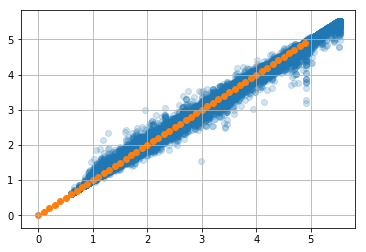

In [23]:
# Previsto vs real
line = np.arange(0, 5, 0.1)

plt.scatter(y,y_hat, Alpha=0.2)
plt.scatter(line,line)
plt.grid(True)

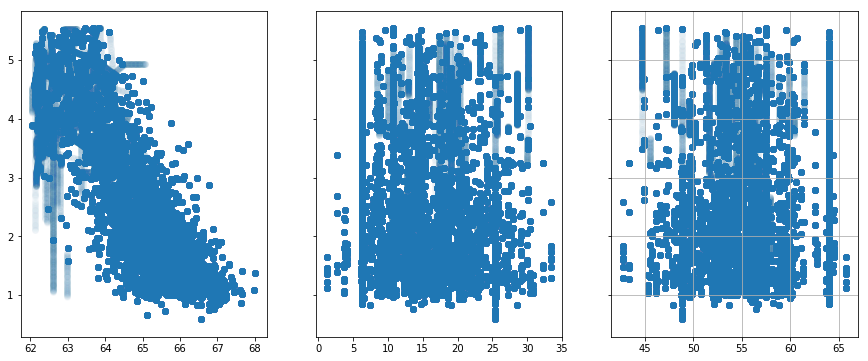

In [27]:
# Plot das 3 variáveis mais importantes 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.scatter(X['% Iron Concentrate'],y, Alpha=0.02)
ax2.scatter(X['% Silica Feed'],y, Alpha=0.02)
ax3.scatter(X['% Iron Feed'],y, Alpha=0.02)

plt.grid(True)

# Evaluation 2
* Repeat without % Iron Concentrate
* The features importance are more "distributed"
* The most important is % silica Feed (0.124), Ore Pulp pH (0.121), % iron Feed (0.105)

In [6]:
# TEST SET

y2_hat = model2.predict(X2)

print ("TEST SET( without % Iron Concentrate)")
print ("MAE:                ", metrics.mean_absolute_error(y2,y2_hat))
print ("RMSE:               ", math.sqrt(metrics.mean_squared_error(y2,y2_hat)))
print ("r2:                 ", model2.score(X2,y2))

# Feature analysis
print ("=====================================")
print ("FEATURE IMPORTANCE:")
for i in range(model2.feature_importances_.size):
    print (X2.columns[i], "=", model2.feature_importances_[i])

TEST SET( without % Iron Concentrate)
MAE:                 0.09200906336632418
RMSE:                0.230086590726365
r2:                  0.9579951933783654
FEATURE IMPORTANCE:
% Iron Feed = 0.10093072276618194
% Silica Feed = 0.1278894478478776
Starch Flow = 0.038093113469359584
Amina Flow = 0.09400335413642844
Ore Pulp Flow = 0.016585597100376794
Ore Pulp pH = 0.12243026881809134
Ore Pulp Density = 0.07944947650366552
Flotation Column 01 Air Flow = 0.017549013476701073
Flotation Column 02 Air Flow = 0.007753614255906385
Flotation Column 03 Air Flow = 0.05145504530156825
Flotation Column 04 Air Flow = 0.08268625336443476
Flotation Column 05 Air Flow = 0.04963939517726231
Flotation Column 06 Air Flow = 0.017820036647436036
Flotation Column 07 Air Flow = 0.006292250529674052
Flotation Column 01 Level = 0.0450827111999908
Flotation Column 02 Level = 0.024436526020697496
Flotation Column 03 Level = 0.044843308047755485
Flotation Column 04 Level = 0.0119640908256503
Flotation Column 05 Le

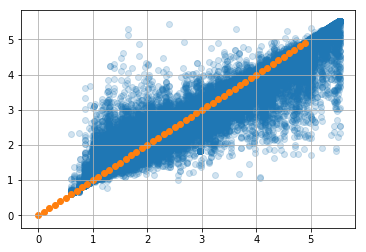

In [10]:
# Previsto vs real
line = np.arange(0, 5, 0.01)

plt.scatter(y2,y2_hat, Alpha=0.2)
plt.scatter(line,line)
plt.grid(True)

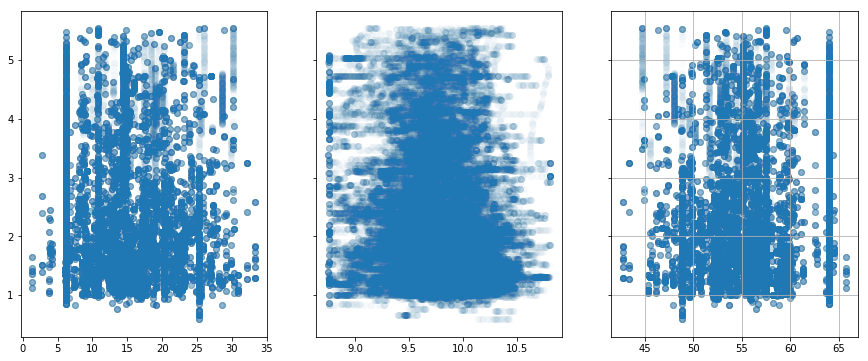

In [20]:
# Plot das 3 variáveis mais importantes 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.scatter(X2['% Silica Feed'],y2, Alpha=0.02)
ax2.scatter(X2['Ore Pulp pH'],y2, Alpha=0.02)
ax3.scatter(X2['% Iron Feed'],y2, Alpha=0.02)

In [39]:
estimator = model2.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X2.columns,
                rounded = True, proportion = False, 
precision = 2, filled = True)